<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Forcasting_Using_Deep_Learning_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction with LSTM (Deep Learning)

In [2]:
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data=("/content/drive/My Drive/Colab Notebooks/TimeSeries/monthly-beer-production-in-austr.csv")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv(data)

In [10]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [11]:
df.Month=pd.to_datetime(df.Month)
df=df.set_index("Month")

In [12]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [13]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


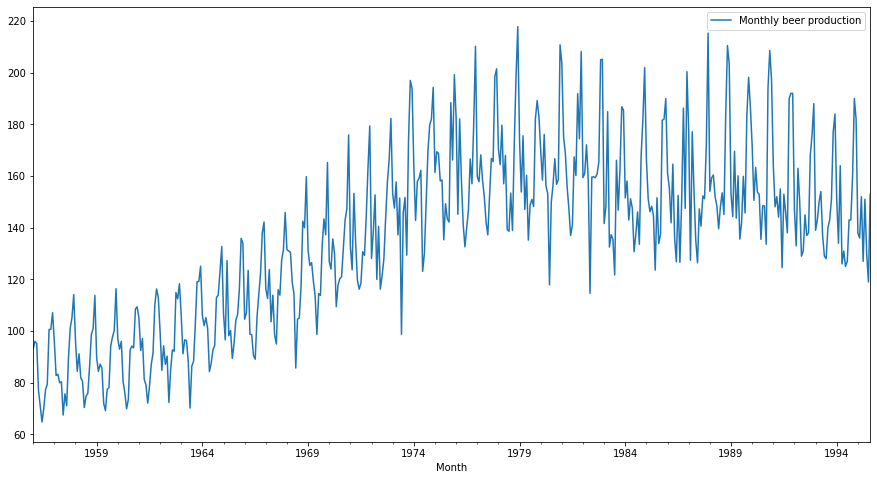

In [14]:
df.plot(figsize=(15,8))

In [15]:
df.shape

(476, 1)

In [16]:
train, test=df[:-12],df[-12:]
scaler=MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

In [17]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train,train, length=n_input,batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=180)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/180
76/76 [==============================] - 1s 16ms/step - loss: 0.0384
Epoch 2/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0159
Epoch 3/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0146
Epoch 4/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0132
Epoch 5/180
76/76 [==============================] - 1s 16ms/step - loss: 0.0119
Epoch 6/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0101
Epoch 7/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0113
Epoch 8/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0092
Epoch 9/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0083
Epoch 10/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0084
Epoch 11/180
76/76 [==============================] - 1s 15ms/step - loss: 0.0080
Epoch 12/180
76/76 [===========

In [18]:
pred_list=[]

batch=train[-n_input:].reshape((1,n_input,n_features))


for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:], [[pred_list[i]]],axis=1)

In [19]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=["Prediction"])

df_test=pd.concat([df,df_predict], axis=1)
df_test.head()

,Monthly beer production,Prediction
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,NaN
1956-03-01,95.2,NaN
1956-04-01,77.1,NaN
1956-05-01,70.9,NaN


In [20]:
df_test.tail()

,Monthly beer production,Prediction
Month,,
1995-04-01,127.0,131.068310
1995-05-01,151.0,131.622207
1995-06-01,130.0,128.096089
1995-07-01,119.0,132.474931
1995-08-01,153.0,140.056947


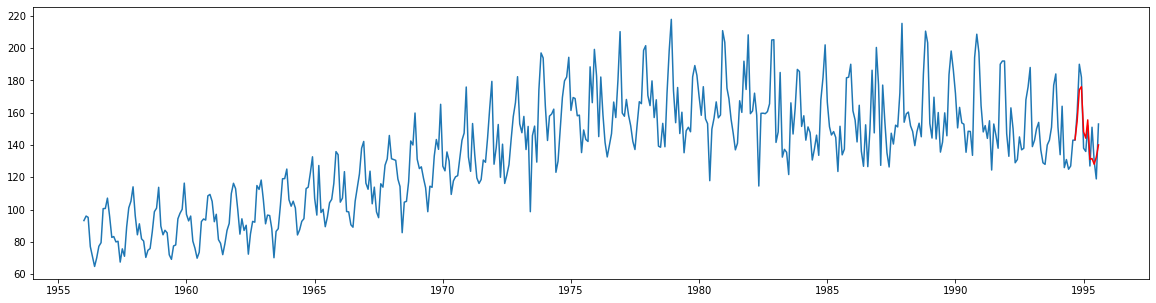

In [23]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index,df_test['Monthly beer production'])
plt.plot(df_test.index,df_test['Prediction'],color='r')
plt.show()

In [24]:
df.tail()

,Monthly beer production
Month,
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0
1995-07-01,119.0
1995-08-01,153.0


In [25]:
train=df

scaler.fit(train)
train=scaler.transform(train)



n_input = 12
n_features = 1

generator = TimeseriesGenerator(train,train, length=n_input,batch_size=6)

model.fit_generator(generator,epochs=180)

pred_list=[]

batch=train[-n_input:].reshape((1,n_input,n_features))


for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:], [[pred_list[i]]],axis=1)

Epoch 1/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0054
Epoch 2/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0056
Epoch 3/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 4/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0054
Epoch 5/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 6/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 7/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 8/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 9/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0058
Epoch 10/180
78/78 [==============================] - 1s 16ms/step - loss: 0.0053
Epoch 11/180
78/78 [==============================] - 1s 16ms/step - loss: 0.0054
Epoch 12/180
78/78 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 13/180
78/78 [=====

In [26]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [27]:
future_dates

,Monthly beer production
1995-09-01,NaN
1995-10-01,NaN
1995-11-01,NaN
1995-12-01,NaN
1996-01-01,NaN
1996-02-01,NaN
1996-03-01,NaN
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN


In [28]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),
                       index=future_dates[-n_input:].index, columns=['Prediction'])

df_project=pd.concat([df,df_predict], axis=1)

In [29]:
df_project.tail(15)

,Monthly beer production,Prediction
1995-06-01,130.0,NaN
1995-07-01,119.0,NaN
1995-08-01,153.0,NaN
1995-09-01,NaN,145.205768
1995-10-01,NaN,167.311215
1995-11-01,NaN,184.122878
1995-12-01,NaN,175.565804
1996-01-01,NaN,140.519288
1996-02-01,NaN,140.782477
1996-03-01,NaN,145.454886


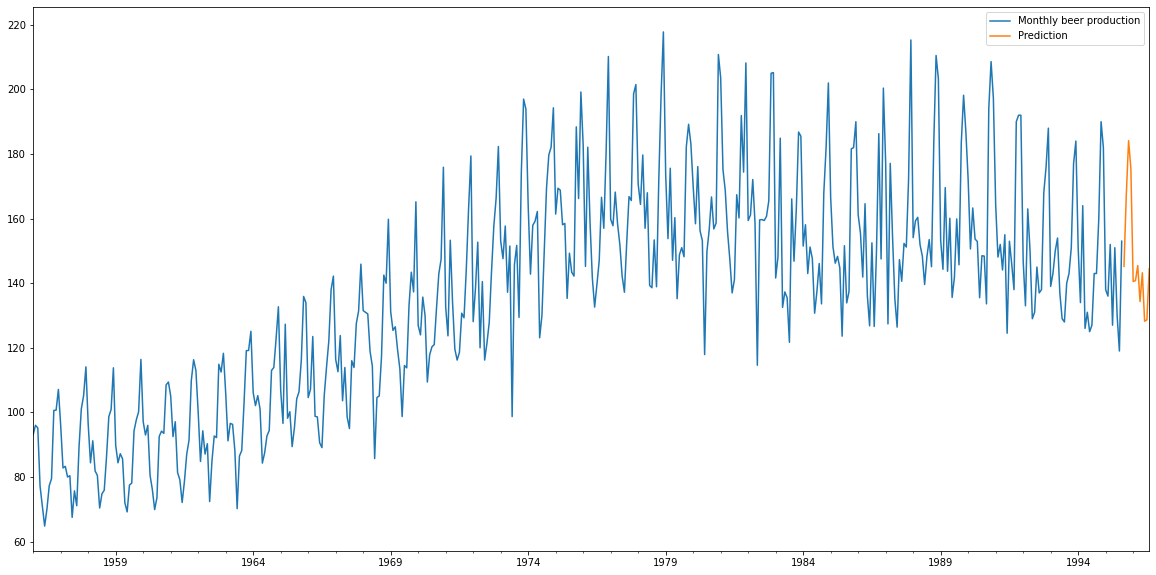

In [30]:
df_project.plot(figsize=(20,10))